In [22]:
import numpy as np

In [23]:
import pandas as pd

In [24]:
import matplotlib.pyplot as plt

In [25]:
import datetime as dt

In [26]:
import seaborn as sns

#### Q1 Merge the datasets Customers, Product Hierarchy and Transactions as Customer_Final. Ensure to keep all customers who have done transactions with us and select the join type accordingly.

In [27]:
cust=pd.read_csv("C:/Users/Rohit/Downloads/Python/Case Study/1 Python Retail Case Study/Customer.csv")
cust.head(3)

,customer_Id,DOB,Gender,city_code
0,268408,02-01-1970,M,4.0
1,269696,07-01-1970,F,8.0
2,268159,08-01-1970,F,8.0


In [28]:
prod=pd.read_csv("C:/Users/Rohit/Downloads/Python/Case Study/1 Python Retail Case Study/prod_cat_info.csv")
prod.head(3)

,prod_cat_code,prod_cat,prod_sub_cat_code,prod_subcat
0,1,Clothing,4,Mens
1,1,Clothing,1,Women
2,1,Clothing,3,Kids


In [29]:
trans=pd.read_csv("C:/Users/Rohit/Downloads/Python/Case Study/1 Python Retail Case Study/Transactions.csv")
trans.head(3)

,transaction_id,cust_id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type
0,80712190438,270351,28-02-2014,1,1,-5,-772,405.300,-4265.300,e-Shop
1,29258453508,270384,27-02-2014,5,3,-5,-1497,785.925,-8270.925,e-Shop
2,51750724947,273420,24-02-2014,6,5,-2,-791,166.110,-1748.110,TeleShop


In [30]:
Customer_Final = pd.merge(pd.merge(left = trans, right = prod, how = 'left', left_on=['prod_subcat_code','prod_cat_code'], right_on=['prod_sub_cat_code','prod_cat_code']).drop(columns= 'prod_sub_cat_code'), cust, how = 'left', left_on ='cust_id', right_on ='customer_Id').drop(columns= 'customer_Id') 
Customer_Final.drop_duplicates(inplace=True)
Customer_Final

,transaction_id,cust_id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type,prod_cat,prod_subcat,DOB,Gender,city_code
0,80712190438,270351,28-02-2014,1,1,-5,-772,405.300,-4265.300,e-Shop,Clothing,Women,26-09-1981,M,5.0
1,29258453508,270384,27-02-2014,5,3,-5,-1497,785.925,-8270.925,e-Shop,Electronics,Computers,11-05-1973,F,8.0
2,51750724947,273420,24-02-2014,6,5,-2,-791,166.110,-1748.110,TeleShop,Books,DIY,27-07-1992,M,8.0
3,93274880719,271509,24-02-2014,11,6,-3,-1363,429.345,-4518.345,e-Shop,Home and kitchen,Bath,08-06-1981,M,3.0
4,51750724947,273420,23-02-2014,6,5,-2,-791,166.110,-1748.110,TeleShop,Books,DIY,27-07-1992,M,8.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23048,94340757522,274550,25-01-2011,12,5,1,1264,132.720,1396.720,e-Shop,Books,Academic,21-02-1972,M,7.0
23049,89780862956,270022,25-01-2011,4,1,1,677,71.085,748.085,e-Shop,Clothing,Mens,27-04-1984,M,9.0
23050,85115299378,271020,25-01-2011,2,6,4,1052,441.840,4649.840,MBR,Home and kitchen,Furnishing,20-06-1976,M,8.0
23051,72870271171,270911,25-01-2011,11,5,3,1142,359.730,3785.730,TeleShop,Books,Children,22-05-1970,M,2.0


In [31]:
Customer_Final['DOB']=pd.to_datetime(Customer_Final['DOB'], format= '%d-%m-%Y')

In [32]:
Customer_Final['tran_date'] = Customer_Final['tran_date'].apply(lambda x : pd.to_datetime(x, infer_datetime_format=True) if x!=0 else x)
Customer_Final

,transaction_id,cust_id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type,prod_cat,prod_subcat,DOB,Gender,city_code
0,80712190438,270351,2014-02-28,1,1,-5,-772,405.300,-4265.300,e-Shop,Clothing,Women,1981-09-26,M,5.0
1,29258453508,270384,2014-02-27,5,3,-5,-1497,785.925,-8270.925,e-Shop,Electronics,Computers,1973-05-11,F,8.0
2,51750724947,273420,2014-02-24,6,5,-2,-791,166.110,-1748.110,TeleShop,Books,DIY,1992-07-27,M,8.0
3,93274880719,271509,2014-02-24,11,6,-3,-1363,429.345,-4518.345,e-Shop,Home and kitchen,Bath,1981-06-08,M,3.0
4,51750724947,273420,2014-02-23,6,5,-2,-791,166.110,-1748.110,TeleShop,Books,DIY,1992-07-27,M,8.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23048,94340757522,274550,2011-01-25,12,5,1,1264,132.720,1396.720,e-Shop,Books,Academic,1972-02-21,M,7.0
23049,89780862956,270022,2011-01-25,4,1,1,677,71.085,748.085,e-Shop,Clothing,Mens,1984-04-27,M,9.0
23050,85115299378,271020,2011-01-25,2,6,4,1052,441.840,4649.840,MBR,Home and kitchen,Furnishing,1976-06-20,M,8.0
23051,72870271171,270911,2011-01-25,11,5,3,1142,359.730,3785.730,TeleShop,Books,Children,1970-05-22,M,2.0


#### Q2. Prepare a summary report for the merged data set.
###### a) Get the column names and their corresponding data types
         

In [33]:
Customer_Final.dtypes

transaction_id               int64
cust_id                      int64
tran_date           datetime64[ns]
prod_subcat_code             int64
prod_cat_code                int64
Qty                          int64
Rate                         int64
Tax                        float64
total_amt                  float64
Store_type                  object
prod_cat                    object
prod_subcat                 object
DOB                 datetime64[ns]
Gender                      object
city_code                  float64
dtype: object

##### b) Top/Bottom 10 observations

In [34]:
Customer_Final.head(10)

,transaction_id,cust_id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type,prod_cat,prod_subcat,DOB,Gender,city_code
0,80712190438,270351,2014-02-28,1,1,-5,-772,405.300,-4265.300,e-Shop,Clothing,Women,1981-09-26,M,5.0
1,29258453508,270384,2014-02-27,5,3,-5,-1497,785.925,-8270.925,e-Shop,Electronics,Computers,1973-05-11,F,8.0
2,51750724947,273420,2014-02-24,6,5,-2,-791,166.110,-1748.110,TeleShop,Books,DIY,1992-07-27,M,8.0
3,93274880719,271509,2014-02-24,11,6,-3,-1363,429.345,-4518.345,e-Shop,Home and kitchen,Bath,1981-06-08,M,3.0
4,51750724947,273420,2014-02-23,6,5,-2,-791,166.110,-1748.110,TeleShop,Books,DIY,1992-07-27,M,8.0
5,97439039119,272357,2014-02-23,8,3,-2,-824,173.040,-1821.040,TeleShop,Electronics,Personal Appliances,1982-10-09,F,6.0
6,45649838090,273667,2014-02-22,11,6,-1,-1450,152.250,-1602.250,e-Shop,Home and kitchen,Bath,1981-05-29,M,9.0
7,22643667930,271489,2014-02-22,12,6,-1,-1225,128.625,-1353.625,TeleShop,Home and kitchen,Tools,1971-04-21,M,9.0
8,79792372943,275108,2014-02-22,3,1,-3,-908,286.020,-3010.020,MBR,Clothing,Kids,1971-11-04,F,8.0
9,50076728598,269014,2014-02-21,8,3,-4,-581,244.020,-2568.020,e-Shop,Electronics,Personal Appliances,1979-11-27,F,3.0


In [35]:
Customer_Final.tail(10)

,transaction_id,cust_id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type,prod_cat,prod_subcat,DOB,Gender,city_code
23043,49882891062,271982,2011-01-25,10,5,4,1330,558.600,5878.600,e-Shop,Books,Non-Fiction,1976-08-10,M,8.0
23044,14787475597,273982,2011-01-25,4,3,5,969,508.725,5353.725,e-Shop,Electronics,Mobiles,1991-10-12,M,4.0
23045,50691119572,273031,2011-01-25,6,5,1,1148,120.540,1268.540,TeleShop,Books,DIY,1980-01-17,F,8.0
23046,40893803228,272049,2011-01-25,11,6,3,1077,339.255,3570.255,e-Shop,Home and kitchen,Bath,1975-06-28,F,6.0
23047,30856003613,266866,2011-01-25,4,2,2,444,93.240,981.240,TeleShop,Footwear,Kids,1974-04-18,M,4.0
23048,94340757522,274550,2011-01-25,12,5,1,1264,132.720,1396.720,e-Shop,Books,Academic,1972-02-21,M,7.0
23049,89780862956,270022,2011-01-25,4,1,1,677,71.085,748.085,e-Shop,Clothing,Mens,1984-04-27,M,9.0
23050,85115299378,271020,2011-01-25,2,6,4,1052,441.840,4649.840,MBR,Home and kitchen,Furnishing,1976-06-20,M,8.0
23051,72870271171,270911,2011-01-25,11,5,3,1142,359.730,3785.730,TeleShop,Books,Children,1970-05-22,M,2.0
23052,77960931771,271961,2011-01-25,11,5,1,447,46.935,493.935,TeleShop,Books,Children,1982-01-15,M,1.0


##### c) “Five-number summary” for continuous variables (min, Q1, median, Q3 and max)

In [36]:
Customer_Final.describe()

,transaction_id,cust_id,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,city_code
count,2.304000e+04,23040.000000,23040.000000,23040.000000,23040.000000,23040.000000,23040.000000,23040.000000,23032.000000
mean,5.006955e+10,271021.880252,6.148785,3.763498,2.435764,637.094965,248.677488,2109.865226,5.483067
std,2.898062e+10,2431.573668,3.726197,1.677091,2.264326,621.727374,187.188311,2505.610295,2.863331
min,3.268991e+06,266783.000000,1.000000,1.000000,-5.000000,-1499.000000,7.350000,-8270.925000,1.000000
25%,2.493315e+10,268935.000000,3.000000,2.000000,1.000000,312.000000,98.280000,762.450000,3.000000
50%,5.009188e+10,270980.500000,5.000000,4.000000,3.000000,710.000000,199.080000,1756.950000,5.000000
75%,7.532632e+10,273114.250000,10.000000,5.000000,4.000000,1109.000000,365.767500,3570.255000,8.000000
max,9.998755e+10,275265.000000,12.000000,6.000000,5.000000,1500.000000,787.500000,8287.500000,10.000000


###### d) Frequency tables for all the categorical variables

In [37]:
Customer_Final.loc[ : , Customer_Final.dtypes=='object'].describe()   

,Store_type,prod_cat,prod_subcat,Gender
count,23040,23040,23040,23031
unique,4,6,18,2
top,e-Shop,Books,Women,M
freq,9304,6066,3046,11804


#### Q3 Generate histograms for all continuous variables and frequency bars for categorical variables

In [38]:
Customer_Final_conti = Customer_Final.loc[ : ,['prod_subcat_code','prod_cat_code', 'Qty', 'Rate', 'Tax', 'total_amt']]

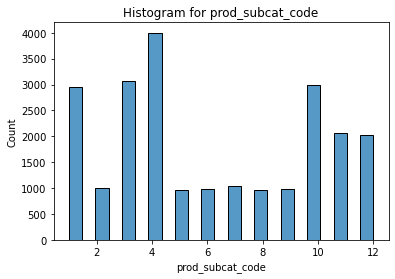

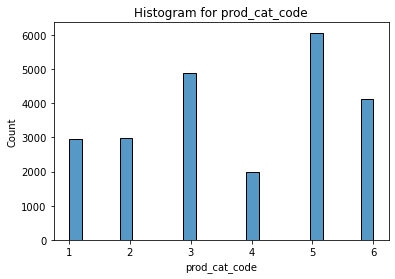

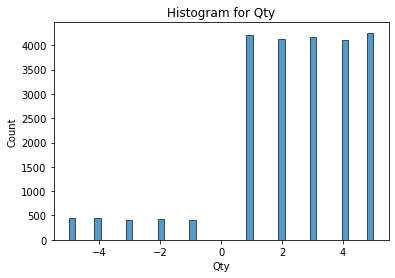

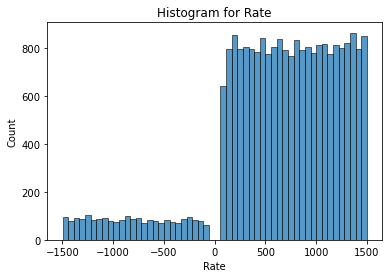

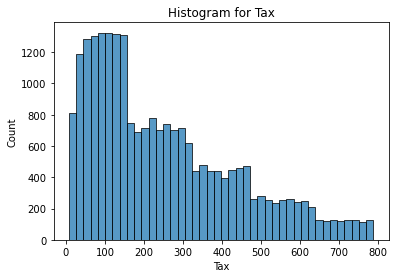

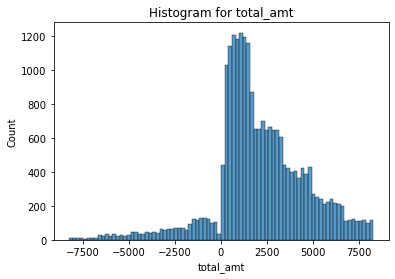

In [39]:
for var in Customer_Final_conti.columns:
    sns.histplot(Customer_Final_conti[var])
    plt.title('Histogram for ' + var)
    plt.show()

In [40]:
Customer_Final_categ= Customer_Final.select_dtypes('object')
Customer_Final_categ.head(3)

,Store_type,prod_cat,prod_subcat,Gender
0,e-Shop,Clothing,Women,M
1,e-Shop,Electronics,Computers,F
2,TeleShop,Books,DIY,M


<function matplotlib.pyplot.show(close=None, block=None)>

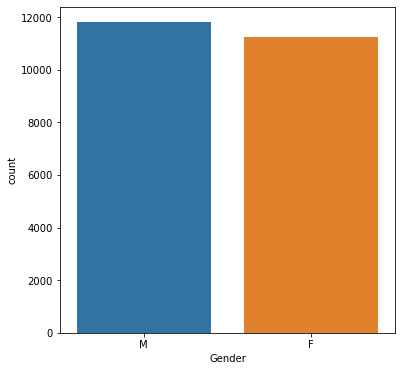

In [41]:
plt.figure(figsize=(6,6))
sns.countplot(x=Customer_Final_categ['Gender'])
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

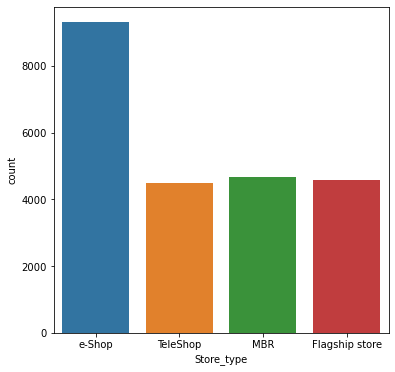

In [42]:
plt.figure(figsize=(6,6))
sns.countplot(x=Customer_Final_categ['Store_type'])
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

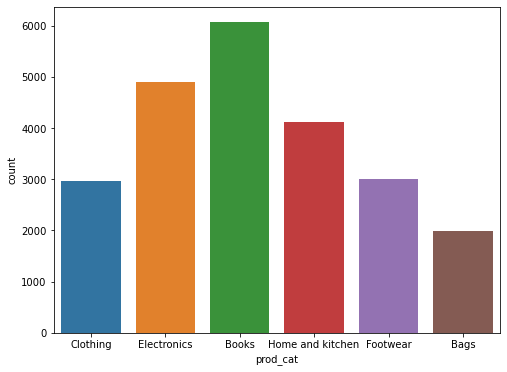

In [43]:
plt.figure(figsize=(8,6))
sns.countplot(x=Customer_Final_categ['prod_cat'])
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

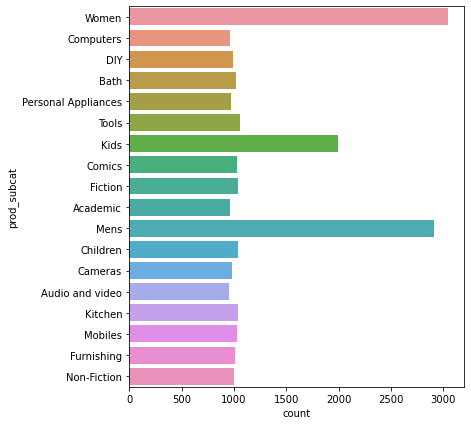

In [44]:
plt.figure(figsize=(6,7))
sns.countplot(y=Customer_Final_categ['prod_subcat'])
plt.show

 #### Q4 Calculate the following information using the merged dataset :
 ##### a) Time period of the available transaction data

In [45]:
min_date= Customer_Final['tran_date'].min()
min_date

Timestamp('2011-01-02 00:00:00')

In [46]:
max_date= Customer_Final['tran_date'].max()
max_date

Timestamp('2014-12-02 00:00:00')

In [47]:
print('Time period of the available transaction data '+min_date.strftime('%d-%m-%y') +' to '+ max_date.strftime('%d-%m-%y'))

Time period of the available transaction data 02-01-11 to 02-12-14


##### b) Count of transactions where the total amount of transaction was negative

In [48]:
negative_tran=Customer_Final.loc[Customer_Final['total_amt'] < 0,'transaction_id'].count()
print(' Count of transactions where the total amount of transaction was negative = ', negative_tran)

 Count of transactions where the total amount of transaction was negative =  2164


#### Q5 Analyze which product categories are more popular among females vs male customers.

In [49]:
pop_categ = Customer_Final.pivot_table(index = 'Gender', columns='prod_cat', values = 'Qty', aggfunc = 'sum')
pop_categ 

prod_cat,Bags,Books,Clothing,Electronics,Footwear,Home and kitchen
Gender,,,,,,
F,2364,7080,3425,5832,3721,4898
M,2346,7587,3748,6486,3561,5051


In [50]:
Customer_Final.head(5)

,transaction_id,cust_id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type,prod_cat,prod_subcat,DOB,Gender,city_code
0,80712190438,270351,2014-02-28,1,1,-5,-772,405.300,-4265.300,e-Shop,Clothing,Women,1981-09-26,M,5.0
1,29258453508,270384,2014-02-27,5,3,-5,-1497,785.925,-8270.925,e-Shop,Electronics,Computers,1973-05-11,F,8.0
2,51750724947,273420,2014-02-24,6,5,-2,-791,166.110,-1748.110,TeleShop,Books,DIY,1992-07-27,M,8.0
3,93274880719,271509,2014-02-24,11,6,-3,-1363,429.345,-4518.345,e-Shop,Home and kitchen,Bath,1981-06-08,M,3.0
4,51750724947,273420,2014-02-23,6,5,-2,-791,166.110,-1748.110,TeleShop,Books,DIY,1992-07-27,M,8.0


#### Q6 Which City code has the maximum customers and what was the percentage of customers from that city?

In [51]:
City_customer_count = Customer_Final.groupby('city_code').cust_id.count().sort_values(ascending=False)
City_customer_count

city_code
4.0     2422
3.0     2410
5.0     2357
7.0     2356
10.0    2333
8.0     2328
2.0     2268
1.0     2255
9.0     2176
6.0     2127
Name: cust_id, dtype: int64

In [52]:
percent_cust= round((City_customer_count[4.0]/City_customer_count.sum())*100, 2)

In [53]:
print('City code 4.0 has maximum customers and the percentage of customer from that city is ', percent_cust)

City code 4.0 has maximum customers and the percentage of customer from that city is  10.52


#### Q7 Which store type sells the maximum products by value and by quantity?

In [54]:
max_sell_store=Customer_Final.groupby('Store_type')[['total_amt', 'Qty']].sum().sort_values(by='Qty', ascending = False)
max_sell_store

,total_amt,Qty
Store_type,,
e-Shop,1.984262e+07,22790
MBR,9.674941e+06,11195
Flagship store,9.721597e+06,11142
TeleShop,9.372134e+06,10993


In [55]:
print('e-shop store sells maximum products by value and by quantity')

e-shop store sells maximum products by value and by quantity


#### Q8  What was the total amount earned from the "Electronics" and "Clothing" categories from Flagship Stores?

In [56]:
Total_earned= Customer_Final.loc[((Customer_Final.prod_cat=='Electronics') | (Customer_Final.prod_cat=='Clothing')) & (Customer_Final.Store_type=='Flagship store'),['total_amt']].sum()
Total_earned

total_amt    3409559.27
dtype: float64

#### Q9  What was the total amount earned from "Male" customers under the "Electronics" category?

In [57]:
Total_earned_M= Customer_Final.loc[(Customer_Final.prod_cat=='Electronics') & (Customer_Final.Gender=='M'), ['total_amt']].sum()
Total_earned_M

total_amt    5711351.62
dtype: float64

In [58]:
print('the total amount earned from "Male" customers under the "Electronics" category is ', Total_earned_M.iloc[0])

the total amount earned from "Male" customers under the "Electronics" category is  5711351.62


#### Q10 How many customers have more than 10 unique transactions, after removing all transactions which have any negative amounts?

In [59]:
Cust_unique_tran= Customer_Final.loc[Customer_Final.total_amt >0, ['cust_id', 'transaction_id']]
print(Cust_unique_tran)

       cust_id  transaction_id
10      270384     29258453508
11      267750     25455265351
12      275023      1571002198
14      269345     36554696014
15      268799     56814940239
...        ...             ...
23048   274550     94340757522
23049   270022     89780862956
23050   271020     85115299378
23051   270911     72870271171
23052   271961     77960931771

[20876 rows x 2 columns]


In [60]:
tran_unique= Cust_unique_tran.pivot_table(index='cust_id', values='transaction_id', aggfunc= 'nunique')
print(tran_unique)

         transaction_id
cust_id                
266783                4
266784                3
266785                7
266788                4
266794               11
...                 ...
275257                4
275261                3
275262                2
275264                2
275265                3

[5506 rows x 1 columns]


In [61]:
tran_unique[tran_unique.transaction_id > 10]

,transaction_id
cust_id,
266794,11
270535,11
270803,11
272741,11
273014,11
274227,11


In [62]:
print('There are 6 such customers having more than 10 unique transactions, which have non negative amounts ')

There are 6 such customers having more than 10 unique transactions, which have non negative amounts 


#### Q11 For all customers aged between 25 - 35, find out:
##### a) What was the total amount spent for “Electronics” and “Books” product categories?

In [63]:
Customer_Final['Age']=round(((Customer_Final.tran_date - Customer_Final.DOB).dt.days/365.25), 2)

In [64]:
print('min age - ', Customer_Final['Age'].min())
print('max age - ', Customer_Final['Age'].max())

min age -  18.11
max age -  44.64


In [65]:
Customer_Final['Age_cat']=pd.cut(Customer_Final['Age'], bins=[13, 24, 35, 46], labels=['14-24', '25-35', '36-46'])

In [66]:
Customer_Final.head(2)

,transaction_id,cust_id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type,prod_cat,prod_subcat,DOB,Gender,city_code,Age,Age_cat
0,80712190438,270351,2014-02-28,1,1,-5,-772,405.300,-4265.300,e-Shop,Clothing,Women,1981-09-26,M,5.0,32.42,25-35
1,29258453508,270384,2014-02-27,5,3,-5,-1497,785.925,-8270.925,e-Shop,Electronics,Computers,1973-05-11,F,8.0,40.80,36-46


In [67]:
Amount_spent_25_35 = Customer_Final.loc[((Customer_Final.prod_cat=='Electronics')|(Customer_Final.prod_cat=='Books')) & (Customer_Final.Age_cat=='25-35'), ['total_amt']].sum()

In [68]:
print('The total amount spent for “Electronics” and “Books” product categories by customers aged 25-35 is', Amount_spent_25_35.iloc[0])

The total amount spent for “Electronics” and “Books” product categories by customers aged 25-35 is 11353800.965


##### b) What was the total amount spent by these customers between 1st Jan, 2014 to 1st Mar, 2014?

In [69]:
cust_tran_date_25_35=Customer_Final[Customer_Final['Age_cat']=='25-35']

In [70]:
cust_tran_date_25_35_spend=cust_tran_date_25_35.loc[(Customer_Final['tran_date'] >='2014-01-01') & (Customer_Final['tran_date'] <='2014-03-01'), ['total_amt']].sum()

In [71]:
print('The total amount spent by customers aged 25-35 between 1st Jan, 2014 to 1st Mar, 2014 is', cust_tran_date_25_35_spend.iloc[0])

The total amount spent by customers aged 25-35 between 1st Jan, 2014 to 1st Mar, 2014 is 692798.535
